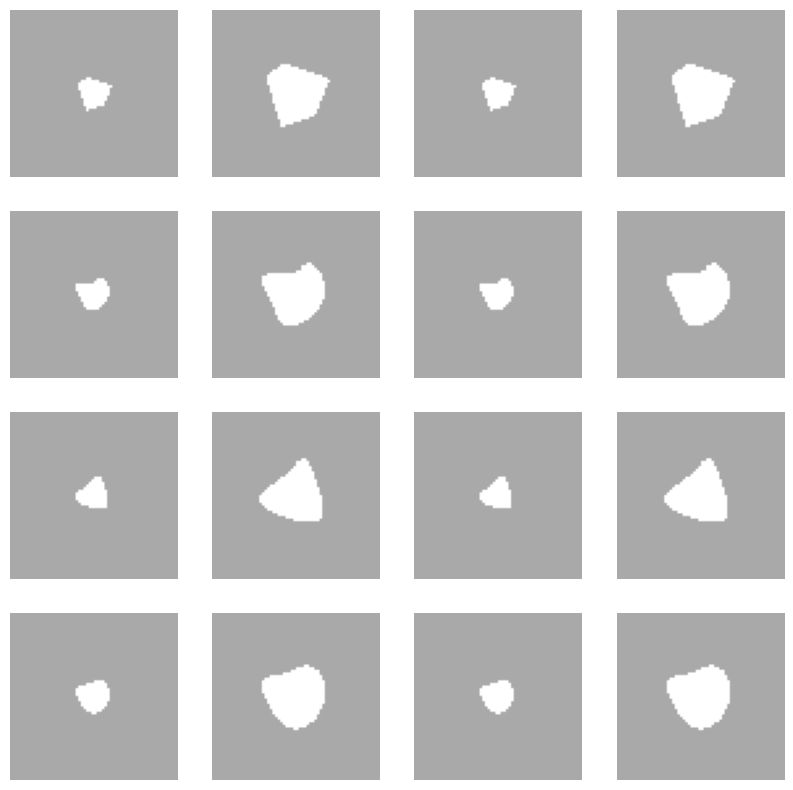

tensor([0.4000, 0.8000, 0.4000, 0.8000, 0.4000, 0.8000, 0.4000, 0.8000, 0.4000,
        0.8000, 0.4000, 0.8000, 0.4000, 0.8000, 0.4000, 0.8000],
       dtype=torch.float64)


In [1]:
from torch.utils.data import DataLoader
import numpy as np

import idsprites as ids
from idsprites.visualization import draw_batch

np.random.seed(0)
'''dataset = ids.InfiniteDSprites()
dataloader = DataLoader(dataset, batch_size=16)
batch_img, factors = next(iter(dataloader))
img = draw_batch(batch_img, save=False, show=True)
print(factors.position_y)'''
np.random.seed(0)

generate_shape = ids.InfiniteDSprites().generate_shape
shapes = [generate_shape() for _ in range(4)]
shapes = [shape for shape in shapes for _ in range(2)] # duplicate each shape

dataset = ids.InfiniteDSprites(
    img_size=64,
    #color_range=["#EEEEEE"],
    orientation_marker_color="#FFFFFF",
    shapes=shapes,
    dataset_size = 10000,
    scale_range = [0.4, 0.8],
    orientation_range= [0.5 * np.pi],
    position_x_range= [0.5],
    position_y_range= [0.5],
    orientation_marker=True,
)
dataloader = DataLoader(dataset, batch_size=16)
batch_img, factors = next(iter(dataloader))
img = draw_batch(batch_img, save=False, show=True)

print(factors.scale)

In [2]:
batch_img.shape

torch.Size([16, 3, 64, 64])

In [10]:


class InfiniteDSpritesFactors(ids.InfiniteDSprites):
    """Infinite (iterable) dataset of factors of variation."""

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def __iter__(self):
        """Generate an infinite stream of factors with shape set to None."""
        while True:
            if self.shapes is not None and self.current_shape_index >= len(self.shapes):
                return
            for color, scale, orientation, position_x, position_y in product(
                *self.ranges.values()
            ):
                if self.dataset_size is not None and self.counter >= self.dataset_size:
                    return
                self.counter += 1
                color = np.array(colors.to_rgb(color))
                yield Factors(
                    shape=None,
                    color=color,
                    shape_id=self.current_shape_id,
                    scale=scale,
                    orientation=orientation,
                    position_x=position_x,
                    position_y=position_y,
                )
            self.current_shape_index += 1



class InfiniteDSpritesMap(Dataset):
    """Finite (map-style) dataset of shapes undergoing transformations."""

    def __init__(self, *args, **kwargs):
        self.dataset = InfiniteDSpritesFactors(*args, **kwargs)
        assert (
            self.dataset.dataset_size is not None or self.dataset.shapes is not None
        ), "Dataset size must be finite. Please set dataset_size or pass a list of shapes."
        self.data = list(self.dataset)
        self.y_transform = kwargs.get("y_transform", lambda y: y)
        self.x_transform = kwargs.get("x_transform", lambda x: x)

    @property
    def targets(self):
        return [factors.shape_id for factors in self.data]

    def __len__(self) -> int:
        return len(self.data)

    def __getitem__(self, index: int):
        shape_index = self.data[index].shape_id
        if self.dataset.shape_ids is not None:
            shape_index = self.dataset.shape_ids.index(shape_index)
        shape = self.dataset.shapes[shape_index]
        factors = self.data[index].replace(shape=shape)
        img = self.x_transform(self.dataset.draw(factors))
        factors = self.y_transform(factors)
        return img, factors
generate_shape = FiniteDSprites().generate_shape_with_verts

sample_vertex = FiniteDSprites().sample_vertex_positions

In [84]:
from itertools import product
for i, (color, scale, orientation, position_x, position_y) in enumerate(product(
                *ds.dataset.ranges.values()
            )):
    print(i)

0
1


In [68]:
sample_vertex(min_verts=3, max_verts=3)

array([[ 1.41310929, -0.55736169, -0.27432395],
       [-0.70340498,  1.06763025, -0.72853536]])

In [86]:
product(ds.dataset.ranges.values())

In [87]:
ds.dataset.ranges.values()

dict_values([['#EEEEEE'], [0.4, 0.8], [1.5707963267948966], [0.5], [0.5]])

In [73]:
ds = InfiniteDSpritesMap(
    img_size=64,
    color_range=["#EEEEEE"],
    orientation_marker_color="#000000",
    shapes=shapes,
    shape_ids=shape_ids,
    #dataset_size = 10000,
    scale_range = [0.4, 0.8],
    orientation_range= [0.5 * np.pi],
    position_x_range= [0.5],
    position_y_range= [0.5],)

In [ ]:

n_samples_per_shape = 10000
shape_ids = []
shapes = []
for n_verts in tqdm(range(3,11)): # InDistribution Shapes
    shapes.append(generate_shape(n_verts))
    shape_ids.append(n_verts)
    

ds = ids.InfiniteDSpritesMap(
    img_size=64,
    color_range=["#EEEEEE"],
    orientation_marker_color="#000000",
    shapes=shapes,
    shape_ids=shape_ids,
    #dataset_size = 10000,
    scale_range = [0.4, 0.8],
    orientation_range= [0.5 * np.pi],
    position_x_range= [0, 0.5],
    position_y_range= [0.5],)

In [ ]:
shape, scale, orientation, x, y

In [89]:
5**4

625

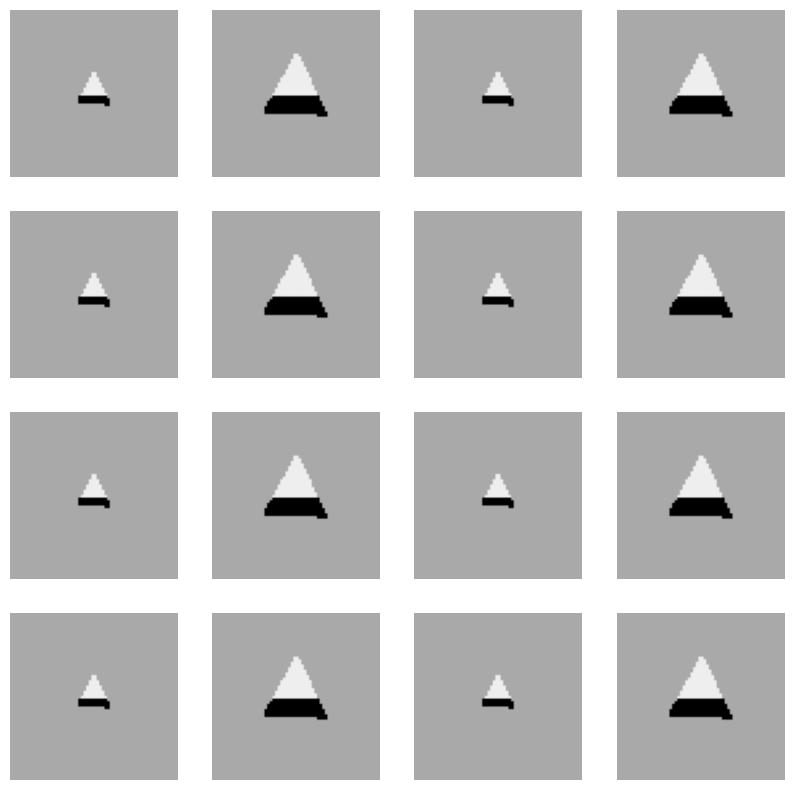

tensor([[[ 0.3524,  0.3523,  0.3522,  ...,  0.3444,  0.3484,  0.3524],
         [-0.4828, -0.4807, -0.4785,  ..., -0.4791, -0.4810, -0.4828]],

        [[ 0.3524,  0.3523,  0.3522,  ...,  0.3444,  0.3484,  0.3524],
         [-0.4828, -0.4807, -0.4785,  ..., -0.4791, -0.4810, -0.4828]],

        [[ 0.3524,  0.3523,  0.3522,  ...,  0.3444,  0.3484,  0.3524],
         [-0.4828, -0.4807, -0.4785,  ..., -0.4791, -0.4810, -0.4828]],

        ...,

        [[ 0.3524,  0.3523,  0.3522,  ...,  0.3444,  0.3484,  0.3524],
         [-0.4828, -0.4807, -0.4785,  ..., -0.4791, -0.4810, -0.4828]],

        [[ 0.3524,  0.3523,  0.3522,  ...,  0.3444,  0.3484,  0.3524],
         [-0.4828, -0.4807, -0.4785,  ..., -0.4791, -0.4810, -0.4828]],

        [[ 0.3524,  0.3523,  0.3522,  ...,  0.3444,  0.3484,  0.3524],
         [-0.4828, -0.4807, -0.4785,  ..., -0.4791, -0.4810, -0.4828]]],
       dtype=torch.float64)
tensor([[0.9333, 0.9333, 0.9333],
        [0.9333, 0.9333, 0.9333],
        [0.9333, 0.9333, 0

In [59]:
dataloader = DataLoader(ds, batch_size=16)
batch_img, factors = next(iter(dataloader))
img = draw_batch(batch_img, save=False, show=True)
for f in factors:
    print(f)

In [60]:
sample_vertex = FiniteDSprites().sample_vertex_positions

sample_vertex(min_verts=3,max_verts=3)

In [37]:
len(ds)

10000

In [10]:
shape_ids

{'id': [44, 45, 21, 6, 26, 10, 23, 39], 'ood': []}

In [25]:
delta=1
print(ds['train'][0+delta][1])

Factors(shape=array([[ 0.03614803,  0.03846261,  0.04077718, ...,  0.03587497,
         0.0360115 ,  0.03614803],
       [-0.25248111, -0.25871175, -0.26494239, ..., -0.23952657,
        -0.24600384, -0.25248111]]), color=array([1., 1., 1.]), shape_id=44, scale=0.5769230769230769, orientation=0.9373516542179335, position_x=0.15384615384615385, position_y=0.23076923076923078)


## Evaluation on 1-step apart latent attribute

In [2]:
import numpy as np
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader
import idsprites as ids
from idsprites.visualization import draw_batch
import torch
import random
from tqdm.notebook import tqdm
from torch.utils.data import Dataset

class FiniteDSprites(ids.InfiniteDSprites):
    def generate_shape_with_verts(self, n_verts):
        """Generate random vertices and connect them with straight lines or a smooth curve.
        Args:
            None
        Returns:
            An array of shape (2, num_verts).
        """
        verts = self.sample_vertex_positions(min_verts = n_verts, max_verts=n_verts)
        shape = (
            #self.interpolate(verts)
            #if np.random.rand() < 0.5
            #else 
            self.interpolate(verts, k=1, num_spline_points=100)
        )
        shape = self.align(shape)
        shape = self.center_and_scale(shape)
        return shape
    def sample_vertex_positions(
        self,
        min_verts: int = 5,
        max_verts: int = 8,
        radius_std: float = 0.4,
        angle_std: float = 0.5,
    ):
        """Sample the positions of the vertices of a polygon.
        Args:
            min_verts: Minimum number of vertices (inclusive).
            max_verts: Maximum number of vertices (inclusive).
            radius_std: Standard deviation of the polar radius when sampling the vertices.
            angle_std: Standard deviation of the polar angle when sampling the vertices.
        Returns:
            An array of shape (2, num_verts).
        """
        num_verts = np.random.randint(min_verts, max_verts + 1)
        rs = np.random.normal(1.0, radius_std, num_verts)
        rs = np.clip(rs, 0.1, 1.9)

        epsilon = 1e-6
        circle_sector = np.pi / num_verts - epsilon
        intervals = np.linspace(0, 2 * np.pi, num_verts, endpoint=False)
        thetas = np.random.normal(0.0, circle_sector * angle_std, num_verts)
        thetas = np.clip(thetas, -circle_sector, circle_sector) + intervals

        verts = [[r * np.cos(theta), r * np.sin(theta)] for r, theta in zip(rs, thetas)]
        verts = np.array(verts).T
        return verts
        
def create_datasets(attributes):
    ds = dict()
    for attribute in attributes:
        print(f"Max Vert: {max_vert}, Attribute: {attribute}")
        ds[attribute] = ids.InfiniteDSpritesMap(
            img_size=64,
            orientation_marker_color="#000000",
            shapes=shapes['id' if attribute != 'shape' else 'ood'],
            shape_ids=shape_ids['id'] if attribute != 'shape' else None,
            scale_range = scale['id' if attribute != 'scale' else 'ood'],
            orientation_range= orientation['id' if attribute != 'orientation' else 'ood'],
            position_x_range= x['id' if attribute != 'x' else 'ood'],
            position_y_range= y['id' if attribute != 'y' else 'ood']
        )
    return ds

def get_dataset_raw_data(ds):
    dl = DataLoader(ds, batch_size=128, shuffle=False)
    images = []
    latents = []
    for imgs, factors in tqdm(dl):
        images.append(imgs)
        if attribute == "shape":
            ss = factors.shape_id
            ss = list(ss)
            ss = [shape_ids['ood'][s.item()] for s in ss]
            ss = torch.tensor(ss)
            
        else:
            ss = factors.shape_id

        latent = torch.cat((ss.unsqueeze(-1), 
                       factors.scale.unsqueeze(-1),
                       factors.orientation.unsqueeze(-1),
                       factors.position_x.unsqueeze(-1),
                       factors.position_y.unsqueeze(-1)),
                      dim=1)
        latents.append(latent)
    images = torch.cat(images, dim=0)
    latents = torch.cat(latents, dim=0)

    return images, latents
    
def get_modified_reps(model, idx, img, label , ds):

    imgs_tgt = []
    target = []
    latents_modified =[]
    for j, attribute in enumerate(attributes):
        new_idx = idx + delta[attribute]
        # check if factor is last factor in case of increasing!
        if attribute != "shape":
            curr_attr = f"position_{attribute}" if attribute in ["x","y"] else attribute
            last_factor = ds.dataset.ranges[curr_attr][-1]
            curr_attr_val = getattr(label,curr_attr)
        else:
            curr_attr = "shape"
            last_factor = ds.dataset.shape_ids[-1]
            curr_attr_val = label.shape_id
        
        if curr_attr_val != last_factor: # Skip if we are at the last value of a factor!
            img_tgt, label_tgt= ds[idx+delta[attribute]]
            imgs_tgt.append(torch.from_numpy(img_tgt))
            zeros = torch.zeros(5)
            if attribute == "shape":
                val = label_tgt.shape_id - label.shape_id
            else:
                val = getattr(label_tgt, curr_attr) - getattr(label, curr_attr)
            zeros[j] = val
            target.append(torch.tensor(j))
            latents_modified.append(zeros)
    
    # Create modified latent vector
    if len(target) != 0:            
        imgs_tgt = torch.stack(imgs_tgt).cuda()
        imgs = torch.tensor(img).repeat(len(imgs_tgt),1,1,1).cuda()
        target = torch.stack(target).cuda()
        latents_modified = torch.stack(latents_modified).cuda()
        reps_latent = model(imgs, latents_modified)
        latents_zeros = torch.zeros_like(latents_modified).cuda()
        reps_target = model(imgs_tgt, latents_zeros) # modified images at pixel level
    else:
        reps_latent = []
        reps_target = []
        target = []
    return reps_latent, reps_target, target


In [1]:
shape_ids = []
shapes = []
max_verts = [14,24,34,54] # 10, 20, 30, 40 total shapes --> 6, 16, 26, 46 training shapes!

m = FiniteDSprites(img_size=64)
# Solve all other attributes
ood_indices = [3,6,9,12]
scale = np.linspace(0.5, 1.0, 14)
orientation = np.linspace(0, 2 * np.pi * 32 / 33, 14)
x = np.linspace(0, 1, 14)
y = np.linspace(0, 1, 14)
scale = {'id': scale[2:-2], 'ood': np.concatenate([scale[:2], scale[-2:]])}
orientation = {'id': orientation[2:-2], 'ood': np.concatenate([orientation[:2], orientation[-2:]])}
x = {'id': x[2:-2], 'ood': np.concatenate([x[:2], x[-2:]])}
y = {'id': y[2:-2], 'ood': np.concatenate([y[:2], y[-2:]])}

# We generate all shapes for all datasets
# This is to make sure shapes are constant between datasets
# i.e. shape with 3 vertices is the same for all datasets

maximum_vertices = max(max_verts)
all_shapes = []
all_shape_ids = []

for n_verts in range(3,maximum_vertices+1):
    all_shapes.append(m.generate_shape_with_verts(n_verts))
    all_shape_ids.append(n_verts - 3)

max_vert = 14
indices = random.sample(range(len(all_shapes)), max_vert-6)
ood_ids = []
shapes = {'id': [all_shapes[i] for i in indices],
              'ood': [all_shapes[i] for i in ood_ids]}
shape_ids = {'id': [all_shape_ids[i] for i in indices],
            'ood': ood_ids}

ds = create_datasets(['train'])

SyntaxError: '[' was never closed (3128265594.py, line 7)

In [6]:
import lightning as L
from easydict import EasyDict as edict
import torch
from train_lightning import get_lightning_model
from datasets import get_dataloaders, IdSprites, PairedDataset
from torch.utils.data import Dataset, random_split, DataLoader
from utils import set_seed, get_args
from tqdm.notebook import tqdm

exp_id = "yxmihnpi"

# Define experiment ids for checkpoint
args = get_args(exp_id)
args.encoder['pretrain_method'] = None
args.test = True
ckpt_path = f"results/idsprites/{exp_id}/epoch=49.ckpt"
#ckpt = torch.load(ckpt_path)

model = get_lightning_model(args)
model = model.encoder.cuda()

In [33]:
from torch.nn.functional import softmax, cosine_similarity, normalize
import pandas as pd
attributes = ['shape','scale','orientation','x','y']

delta = { 'shape': 10000, 'scale': 1000, 'orientation': 100, 'x': 10, 'y': 1} # how many samples to skip to reach a sample of next level in attribute

final_result = []
targets  = []
metrics = {'acc': [], 'confidence': [], 'target': []}
for idx, (img, label) in tqdm(enumerate(ds['train']), total=len(ds['train'])):
    with torch.no_grad():
        reps_latent, reps_target, target = get_modified_reps(model, idx, img, label, ds['train'])
        reps_latent = normalize(reps_latent, dim=1)
        reps_target = normalize(reps_target, dim=1)
        result = torch.matmul(reps_latent, reps_target.T)
        soft_result = softmax(result, dim=1) # get confidence in classification
        conf_preds = soft_result.argmax(dim=1)
        preds =  result.argmax(dim=1)
        # Generate the indices (0, 1, 2, ..., N-1)
        correct = (preds == target).float()
        metrics['acc'].append(correct)
        metrics['target'].append(target)
        metrics['confidence'].append(conf_preds)


  0%|          | 0/80000 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [ ]:
for k, v in metrics.items():
    metrics[k] = torch.cat(v, dim=0)

In [ ]:
df = pd.DataFrame(metrics)
grouped_means = df.groupby("target")[["acc", "confidence"]].mean()

print(grouped_means)

In [17]:
metrics['acc'] = torch.cat(metrics['acc'], dim=0)

In [22]:
for k, v in metrics.items():
    metrics[k] = v.cpu()

In [20]:
metrics['confidence']

tensor([3, 3, 3,  ..., 0, 0, 0], device='cuda:0')

## Create Dataset

In [35]:
len(ds['train'])

80000

In [ ]:

shape_ids = []
shapes = []
max_verts = [14,24,34,54] # 10, 20, 30, 50 total shapes --> 6, 16, 26, 46 training shapes!
ood_ids_inter = [10,20,30,40] ## ood_indices when interpolating
ood_indices = [3,6,9,12]      ##  "    "       "      "

m = FiniteDSprites(img_size=64)
# Solve all other attributes
scale = np.linspace(0.5, 1.0, 14)
orientation = np.linspace(0, 2 * np.pi * 32 / 33, 14)
x = np.linspace(0, 1, 14)
y = np.linspace(0, 1, 14)
polation = "inter"
if polation == "extra":
    scale = {'id': scale[2:-2], 'ood': np.concatenate([scale[:2], scale[-2:]])}
    orientation = {'id': orientation[2:-2], 'ood': np.concatenate([orientation[:2], orientation[-2:]])}
    x = {'id': x[2:-2], 'ood': np.concatenate([x[:2], x[-2:]])}
    y = {'id': y[2:-2], 'ood': np.concatenate([y[:2], y[-2:]])}
else:
    scale = {'id': scale[[idx for idx in range(14) if idx not in ood_indices]], 'ood': scale[ood_indices]}
    orientation = {'id': orientation[[idx for idx in range(14) if idx not in ood_indices]], 'ood':  orientation[ood_indices]}
    x = {'id': x[[idx for idx in range(14) if idx not in ood_indices]], 'ood': x[ood_indices]}
    y = {'id': y[[idx for idx in range(14) if idx not in ood_indices]], 'ood': y[ood_indices]}
# We generate all shapes for all datasets
# This is to make sure shapes are constant between datasets
# i.e. shape with 3 vertices is the same for all datasets

maximum_vertices = max(max_verts)
all_shapes = []
all_shape_ids = []


for n_verts in range(3,maximum_vertices+1):
    all_shapes.append(m.generate_shape_with_verts(n_verts))
    all_shape_ids.append(n_verts - 3)
    
for max_vert in tqdm(max_verts): #  Shapes OOD = (3,4,11,12), ID= {5..10} # 10 total shapes

    # Generate datasets!
    # Select OOD shapes! (depends on polation)
    if polation == "extra":
        ood_ids =[0,1,maximum_vertices-4, maximum_vertices-3]
        new_all_shapes = all_shapes[2:-2]
        new_all_shape_ids = all_shape_ids[2:-2]
        
    else: # We remove 5 and 10 vertices shapes from all datasets!
        ood_ids = ood_ids_inter
        new_all_shapes = [all_shapes[i] for i in range(len(all_shapes)) if i not in ood_ids]
        new_all_shape_ids =  [all_shape_ids[i] for i in range(len(all_shapes)) if i not in ood_ids]

    # Randomly sample indices without replacement
    indices = random.sample(range(len(new_all_shapes)), max_vert-6)
    indices = sorted(indices)
    # Extract elements from both lists at the sampled indices
    shapes = {'id': [new_all_shapes[i] for i in indices],
              'ood': [all_shapes[i] for i in ood_ids]}
    shape_ids = {'id': [new_all_shape_ids[i] for i in indices],
                'ood': ood_ids}

    # Create id train set
    attributes =  ['train', 'shape', 'scale', 'orientation', 'x', 'y']
    ds = create_datasets(attributes)

    # Store to disk! 
    for attribute in tqdm(attributes):
        images, latents = get_dataset_raw_data(ds[attribute])           
        # Save files!
        np.savez(f"idsprites_{polation}_{max_vert}_images_{attribute}.npz", images.numpy())
        np.savez(f"idsprites_{polation}_{max_vert}_latents_{attribute}.npz", latents.numpy())


  0%|          | 0/4 [00:00<?, ?it/s]

Max Vert: 14, Attribute: train
Max Vert: 14, Attribute: shape
Max Vert: 14, Attribute: scale
Max Vert: 14, Attribute: orientation
Max Vert: 14, Attribute: x
Max Vert: 14, Attribute: y


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

Max Vert: 24, Attribute: train
Max Vert: 24, Attribute: shape
Max Vert: 24, Attribute: scale
Max Vert: 24, Attribute: orientation
Max Vert: 24, Attribute: x
Max Vert: 24, Attribute: y


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1407 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/563 [00:00<?, ?it/s]

  0%|          | 0/563 [00:00<?, ?it/s]

  0%|          | 0/563 [00:00<?, ?it/s]

  0%|          | 0/563 [00:00<?, ?it/s]

Max Vert: 34, Attribute: train
Max Vert: 34, Attribute: shape
Max Vert: 34, Attribute: scale
Max Vert: 34, Attribute: orientation
Max Vert: 34, Attribute: x
Max Vert: 34, Attribute: y


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2188 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/875 [00:00<?, ?it/s]

  0%|          | 0/875 [00:00<?, ?it/s]

  0%|          | 0/875 [00:00<?, ?it/s]

  0%|          | 0/875 [00:00<?, ?it/s]

Max Vert: 54, Attribute: train
Max Vert: 54, Attribute: shape
Max Vert: 54, Attribute: scale
Max Vert: 54, Attribute: orientation
Max Vert: 54, Attribute: x
Max Vert: 54, Attribute: y


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3750 [00:00<?, ?it/s]

In [3]:
def get_dataset_raw_data(ds, attribute_data, batch_size=128):
    dictionaries = list()
    dictionaries.append({shape_id: i for i, shape_id in enumerate(attribute_data['shape_ids'])})
    dictionaries.append({scale: i for i, scale in enumerate(attribute_data['scale'])})
    dictionaries.append({orientation: i for i, orientation in enumerate(attribute_data['orientation'])})
    dictionaries.append({x: i for i, x in enumerate(attribute_data['x'])})
    dictionaries.append({y: i for i, y in enumerate(attribute_data['y'])})
    
    dl = DataLoader(ds, batch_size=batch_size, shuffle=False)
    images = []
    latents = []
    latent_ids = []
    for imgs, factors in tqdm(dl):
        images.append(imgs.to(torch.int8))
        ss = factors.shape_id
        latent = torch.cat((ss.unsqueeze(-1), 
                       factors.scale.unsqueeze(-1),
                       factors.orientation.unsqueeze(-1),
                       factors.position_x.unsqueeze(-1),
                       factors.position_y.unsqueeze(-1)),
                      dim=1)
        latents.append(latent)
        # obtain the position in the list of each value of the latent
        temp_l_ids = []
        attributes = ['shape','scale','orientation','x','y']
        for i in range(5):
            result = apply_mapping(latent[:,i], dictionaries[i]).unsqueeze(1)
            #print(attributes[i], latent[:3,i], result[:3], dictionaries[i])
            temp_l_ids.append(result)
            
        latent_ids.append(torch.cat(tuple(temp_l_ids),dim=1))
    images = torch.cat(images, dim=0)
    latents = torch.cat(latents, dim=0)
    latent_ids = torch.cat(latent_ids, dim=0).to(torch.int8)

    print(images.shape, latents.shape, latent_ids.shape)

    return images, latents, latent_ids

# Function to map values based on the dictionary
def apply_mapping(tensor, mapping_dict):
    # Create a default tensor to store the mapped values
    mapped_tensor = torch.empty_like(tensor)
    for key, value in mapping_dict.items():
        mapped_tensor[tensor == key] = value
    return mapped_tensor

def create_dataset(attribute_data, batch_size=128):

    # Create all shapes
    ds = ids.InfiniteDSpritesMap(
        img_size=attribute_data['img_size'],
        orientation_marker_color="#FFFFFF",
        shapes=attribute_data['shapes'],#shapes['id' if attribute != 'shape' else 'ood'],
        shape_ids=attribute_data['shape_ids'],#shape_ids['id'] if attribute != 'shape' else None,
        scale_range =attribute_data['scale'],# scale['id' if attribute != 'scale' else 'ood'],
        orientation_range=attribute_data['orientation'],# orientation['id' if attribute != 'orientation' else 'ood'],
        position_x_range=attribute_data['x'],# x['id' if attribute != 'x' else 'ood'],
        position_y_range=attribute_data['y'],# y['id' if attribute != 'y' else 'ood'],
        grayscale=attribute_data['grayscale']
        )
    images, latents, latent_ids = get_dataset_raw_data(ds, attribute_data, batch_size=batch_size)
    return images, latents, latent_ids

n_shapes = 54
attribute_data = dict()

all_shapes = []
all_shape_ids = []
m = FiniteDSprites(img_size=64)
for n_verts in range(3,n_shapes+4):
    all_shapes.append(m.generate_shape_with_verts(n_verts))
    all_shape_ids.append(n_verts - 3)

attribute_data['img_size'] = 64
attribute_data['grayscale'] = True
attribute_data['shapes'] = all_shapes
attribute_data['shape_ids'] = all_shape_ids

# Solve all other attributes
attribute_data['scale'] = np.linspace(0.5, 1.0, 14)
attribute_data['orientation'] = np.linspace(0, 2 * np.pi * 32 / 33, 14)
attribute_data['x'] = np.linspace(0, 1, 14)
attribute_data['y'] = np.linspace(0, 1, 14)
batch_size = 2048
images, latents, latent_ids = create_dataset(attribute_data, batch_size=batch_size)

  0%|          | 0/1032 [00:00<?, ?it/s]

torch.Size([2112880, 1, 64, 64]) torch.Size([2112880, 5]) torch.Size([2112880, 5])


In [5]:
data = {'images': images, 'latents': latents, 'latent_ids': latent_ids, 'meta': attribute_data}
torch.save(data,"idsprites.pth")

In [23]:
images1 = images
latents1 = latents
latent_ids1 = latent_ids

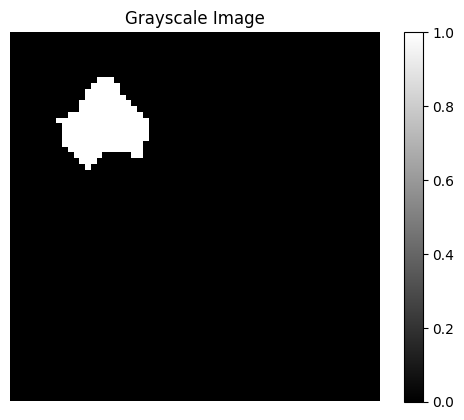

In [4]:
import torch
import matplotlib.pyplot as plt

# Example: Create a grayscale image tensor
i = 7
image_tensor = images[14*14*14*14*i]

# Squeeze the tensor to remove the channel dimension if necessary
image_tensor = image_tensor.squeeze()  # Shape: (H, W)

# Convert tensor to NumPy array for visualization
image_numpy = image_tensor.detach().cpu().numpy()

# Plot the grayscale image
plt.imshow(image_numpy, cmap="gray")
plt.colorbar()  # Optional: Display color bar for intensity reference
plt.title("Grayscale Image")
plt.axis("off")  # Optional: Remove axis ticks
plt.show()

In [2]:


# Create Dictionary
dictionary = dict()

for split, ds in zip(splits, datasets):
    add_tuples_to_dictionary(dictionary, ds, split)



def evaluate_datasets(distance):

    for ds in datasets:
        for img, tgt in ds:
            # Create all candidates
            gt_candidates = []
            prediction_candidates = []
            for attribute in attributes:
                temp_tgt = tgt
                temp_tgt[attribute] += 1
                split, idx = dictionary(temp_tgt)
                tgt_img, tgt_label = datasets[split][idx]
                prediction_candidates.append(model(tgt_img, temp_tgt - tgt))
                gt_candidates.append(model(tgt_img, zero_latent))
            torch.mm(prediction_candidates, gt_candidates)
            # define whether results are iid-iid, iid-ood, ood-iid, ood-ood
            

SyntaxError: invalid syntax (1126308110.py, line 9)

In [4]:
from datasets import IdSprites
data_dir = "idsprites"
n_shapes = 14
datasets = dict()
for split in ['train','shape',"scale","orientation","x", "y"]:
    datasets[split if split != "shape" else "test"] = IdSprites(root_dir = data_dir,
     split=split,
     shuffle=False,
     pretrained_arch = None,
     n_shapes = n_shapes)

In [61]:
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader
import torch
# Create Dictionary
dictionary = dict()
bs = 512
model = None #get_model()
def add_tuples_to_dictionary(model, dictionary, dl, split):
    for imgs, latents in tqdm(dl):
        #reps = model(imgs)
        reps = torch.randn((bs,768))

        for img, rep, latent in zip(imgs, reps, latents):
            lat = tuple(latent.numpy())
            dictionary[lat] = (img, rep, split)

    return dictionary
    
for split, ds in tqdm(datasets.items()):
    dl = DataLoader(ds, batch_size = bs)
    add_tuples_to_dictionary(model, dictionary, dl, split)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

In [15]:
for split, ds in tqdm(datasets.items()):
    print(split, len(ds))

  0%|          | 0/6 [00:00<?, ?it/s]

train 80000
test 40000
scale 32000
orientation 32000
x 32000
y 32000


In [63]:
attributes = {'shape': set(),
              'scale': set(),
              'orientation': set(),
              'x': set(),
              'y': set()
             }
for latent in dictionary.keys():
    shape,scale,orientation,x,y = latent
    attributes['shape'].add(shape)
    attributes['scale'].add(scale)
    attributes['orientation'].add(orientation)
    attributes['x'].add(x)
    attributes['y'].add(y)

attributes = {k: sorted(list(v)) for k,v in attributes.items()}

In [86]:

data = dictionary
def get_sample_data(l, attribute, up=True):
    
    order = {'shape': 0, 'scale': 1, 'orientation': 2, 'x': 3, 'y':  4}
    old_value = l[order[attribute]]
    idx = attributes[attribute].index(old_value)
    l = list(l) # convert to list for ease
    idx = idx + 1 if up else idx - 1
    n_vals =  len(attributes[attribute])
    if idx == n_vals or idx < 0:
        return None, None

    new_value = attributes[attribute][idx]
    l[order[attribute]] = new_value
    delta = [0.0,0.0,0.0,0.0,0.0]
    delta[order[attribute]] = new_value - old_value
    return tuple(l),  tuple(delta)
errors = 0
for latent, rep in tqdm(data.items()):

    # Create all candidates
    gt_candidates = []
    prediction_candidates = []
    pred_cand_latents = []
    
    for attribute in attributes:
        #print(latent)
        candidate, c_latent = get_sample_data(latent, attribute)
        #print(candidate, attribute)
        if candidate is not None:
            try:
                c_img, c_rep, split = dictionary[candidate]
                prediction_candidates.append(c_img)
                pred_cand_latents.append(torch.tensor(list(c_latent)))
                gt_candidates.append(c_rep)
            except KeyError as e:
                errors+=1

    #print(prediction_candidates)
    if len(prediction_candidates) > 0:
        prediction_candidates = torch.stack(prediction_candidates)
        pred_cand_latents = torch.stack(pred_cand_latents)
        #prediction_candidates = model(prediction_candidates, pred_cand_latents)
        prediction_candidates = torch.randn((5, 768))
        gt_candidates = torch.stack(gt_candidates)
        #print(prediction_candidates.shape, gt_candidates.shape)
        result = torch.mm(prediction_candidates, gt_candidates.T)

  0%|          | 0/248000 [00:00<?, ?it/s]

In [75]:
torch.stack(gt_candidates).shape

torch.Size([5, 768])

In [52]:



lat = (42.0, 1.0, 6.092785752416568, 1.0, 0.9230769230769231)
print(get_sample_data(lat, attribute="shape",up=True))

((51.0, 1.0, 6.092785752416568, 1.0, 0.9230769230769231), (9.0, 0.0, 0.0, 0.0, 0.0))


In [11]:
import torch.nn as nn

class TestModel(nn.Module):
    def __init__(self):
        super(TestModel, self).__init__()
        lin1 = nn.Linear(4096, 768) 
        lin2 = nn.Linear(5, 768)
    def forward(self, x, latent):
        bs = x.shape[0]
        x = x.view(bs,-1)
        x = lin1(x)
        l = lin2(latent)
        return x+l

model = TestModel().cuda()

pandas_data = {
                'original_idx': [],
                'gt_idx': [],
                'correct': [], 
                'detail_pred': [], 
                'attribute': [], 
                'delta': [] 
              }

with torch.no_grad():
    for delta in tqdm([1,2,3,4,5]):
        for idx, (img, latent, latent_ids) in tqdm(enumerate(zip(images,latents,latent_ids))):
            # generate delta latents for predictions/false candidates
            deltas = torch.tensor([delta]*5 + [-delta]*5)
            attributes = np.array(['shape', 'scale', 'orientation','x','y']*2)
            pred_delta_latents = delta*torch.eye(5)
            pred_delta_latents = torch.cat((pred_delta_latents,-pred_delta_latents),dim=0)
            
            new_latents_idxs = latent_ids.repeat(10,1) + pred_delta_latents
            out_of_min_range = new_latents_idxs >= 0
            out_of_max_range = new_latents_idxs < 14
            out_of_max_range[:,0] = new_latents_idxs[:,0] < 54
            out_of_range = out_of_max_range*out_of_min_range
            viable_latents = torch.all(out_of_range,dim=1)
            new_latents_idxs = new_latents_idxs[viable_latents].to(torch.int8)
            deltas = deltas[viable_latents].to(torch.int8)
            attributes = attributes[viable_latents]
            new_latents = torch.stack(
                [
                    torch.tensor([attrs[j][new_latents_idxs[i, j]] for j in range(new_latents_idxs.shape[1])])
                    for i in range(new_latents_idxs.shape[0])
                ]
            )
    
            pred_delta_latents = new_latents - latent
            idx_coefs = torch.tensor([14**(4-i) for i in range(5)]).unsqueeze(0).T
            gt_indices = torch.mm(new_latent_idxs, idx_coefs)
    
                # generate latents for +delta for all attributes
                # generate latents for -delta for all attributes
                # This should generate between 5 to 10 predictions per image,
                # as some latents may be outside the dataset range.
                # assert len(pred_delta_latents) == len(ground_truth_latents)
            # generate latents for ground trut
            
            # retrieve samples for ground truth using latents to get ids
            # calculate reps for predictions and ground truth
            # Create batch for getting reps
            n_candidates = len(pred_delta_latents)
            pred_images = img.repeat(2*n_candidates)
            gt_images, *_ = ds[gt_indices]
    
            imgs = torch.cat((pred_images,gt_images))
        
            zero_latents = torch.zeros_like(pred_delta_latents)
            all_latents = torch.cat((pred_delta_latents, zero_latents))
            
            # Get reps for candidates and ground truth, batched together for efficiency
    
            reps = model(imgs.cuda(), all_latents.cuda()) 
            pred_reps = reps[: n_candidates]
            gt_reps = reps[n_candidates:]
            # with reps calculate dot product
            pred_reps = nn.functional.normalize(pred_reps, p=2, dim=1)
            gt_reps = nn.functional.normalize(gt_reps, p=2, dim=1)
            result = torch.mm(pred_reps, gt_reps.T)
            
            # the ith line is correct if the i-th value is max
            predicted = result.argmax(dim=1)
            ground_truth = torch.tensor(list(range(n_candidates)))
            correct = (predicted == ground_truth).to(torch.int8)
            detail_pred = np.char.add(np.char.add(attributes[predicted], " "), deltas.astype(str))
            
            # returns
            # img_idx = index for original image
            # ground_truth_indices = index for target ground truth image
            # correct = whether the predicted change is closer to the ground truth representation
            # detail_pred = which was the representation that was predicted 
            # e.g. ("shape/-1", means that it was the change in "shape" with delta -1
            # attributes = which attribute we are evaluating for prediction
            # deltas = what was the delta applied for the prediction
            original_idx = idx.repeat(n_candidates, 1)
            pandas_data['original_idx'].append(original_idx)
            pandas_data['gt_idx'].append(gt_indices)
            pandas_data['correct'].append(correct)
            pandas_data['detail_pred'].append(detail_pred)
            pandas_data['attribute'].append(attributes)
            pandas_data['delta'].append(deltas)
            if idx == 100:
                break
                

  0%|          | 0/5 [00:00<?, ?it/s]

TypeError: iteration over a 0-d tensor

In [35]:
delta = 5
pred_delta_latents = delta*torch.eye(5)
pred_delta_latents = torch.cat([pred_delta_latents,-pred_delta_latents], dim=0)

In [15]:
latent_ids

tensor(0, dtype=torch.int8)

In [40]:
example_latent_id = torch.randint(0,14,(5,))

tensor([11,  5, 13, 11,  4])

In [ ]:
example_latent_id.repeat(10,1) + pre_